### 1. Finite Difference method for solving discrete Laplace Equation

In [27]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.sparse import csc_matrix
from scipy.sparse import dia_array
from scipy.sparse import dia_matrix
import scipy.sparse.linalg as splinalg
from numba import njit, prange

In [28]:
N = 4
min, max = -1, 1
dx = (max - min) / N

In [29]:
def generate_D(n):
    ex = np.ones(n)
    data = np.array([-1 * ex, 4 * ex, -1 * ex])
    offsets = np.array([-1, 0, 1])
    
    return dia_matrix((data, offsets), shape=(n, n)).toarray()

In [30]:
@njit(parallel = True)
def kernel(N, A, D, I):
    for i in prange(N):
        for j in prange(N):
            if i == j:
                for ii in prange(N):
                    for jj in prange(N):
                        A[ii+N*i, jj+N*j] = D[ii, jj]
                        
            if np.abs(i - j) == 1:
                for ii in prange(N):
                    for jj in prange(N):
                        A[ii+N*i, jj+N*j] = I[ii, jj]
                        
    return A

In [31]:
def generate_A(N):
    A = np.zeros((N ** 2, N ** 2))
    D = generate_D(N)
    I = -np.identity(N)
    A = kernel(N, A, D, I)
    return A

In [32]:
def generate_b(N, dx):
    b = np.zeros(N ** 2).reshape(N, N)
    b[2, 2] = -1 * np.square(dx)
    plt.imshow(b, origin = 'lower')
    plt.colorbar()
    return b.reshape(N ** 2)

In [33]:
# solve
def solve(N, dx):
    a = generate_A(N)
    a = csc_matrix(a) # transform to the fitting matrix
    b = generate_b(N, dx)
    x = splinalg.spsolve(a, b).reshape(N, N)
    return x

[[-0.00598485 -0.0119697  -0.01549242 -0.00916667]
 [-0.0119697  -0.02640152 -0.04083333 -0.02117424]
 [-0.01549242 -0.04083333 -0.10026515 -0.03469697]
 [-0.00916667 -0.02117424 -0.03469697 -0.01734848]]


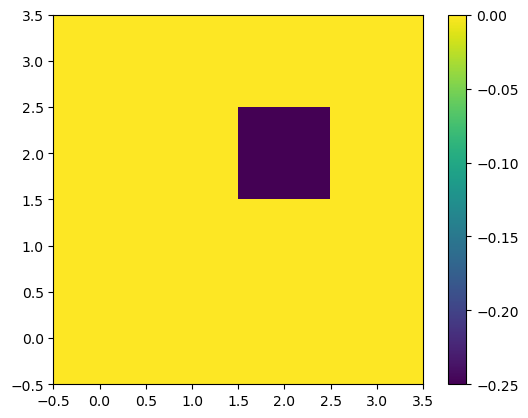

In [34]:
u = solve(N, dx)
print(u)

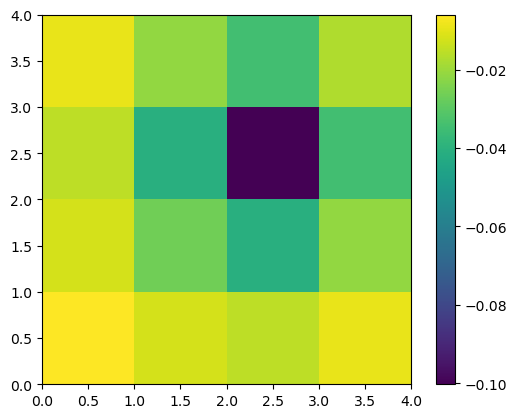

In [39]:
plt.imshow(u, origin = 'lower', extent = [0,4,0,4])
plt.colorbar()